In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customers-churn/Bank Customer Churn Prediction.csv


In [2]:
data = pd.read_csv('/kaggle/input/customers-churn/Bank Customer Churn Prediction.csv')

In [3]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [5]:
data['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [6]:
data['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
data.drop(columns=['customer_id','credit_score'],inplace=True)

In [9]:
data.head()

,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
data = pd.get_dummies(data,columns=['gender','country'])

In [11]:
data.head()

,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Female,gender_Male,country_France,country_Germany,country_Spain
0,42,2,0.00,1,1,1,101348.88,1,True,False,True,False,False
1,41,1,83807.86,1,0,1,112542.58,0,True,False,False,False,True
2,42,8,159660.80,3,1,0,113931.57,1,True,False,True,False,False
3,39,1,0.00,2,0,0,93826.63,0,True,False,True,False,False
4,43,2,125510.82,1,1,1,79084.10,0,True,False,False,False,True


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
scaler = StandardScaler()

In [14]:
x = data.drop(columns='churn')
y = data['churn']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
print(x_train_scaled,x_test_scaled)
print(x_train_scaled.shape,x_test_scaled.shape)

[[-0.6557859   0.34567966 -1.21847056 ...  1.00150113 -0.57946723
  -0.57638802]
 [ 0.29493847 -0.3483691   0.69683765 ... -0.99850112  1.72572313
  -0.57638802]
 [-1.41636539 -0.69539349  0.61862909 ... -0.99850112 -0.57946723
   1.73494238]
 ...
 [-0.08535128 -1.38944225 -1.21847056 ...  1.00150113 -0.57946723
  -0.57638802]
 [ 0.3900109   1.03972843  1.8272593  ...  1.00150113 -0.57946723
  -0.57638802]
 [ 1.15059039 -1.38944225  1.1497197  ... -0.99850112  1.72572313
  -0.57638802]] [[-0.6557859  -0.69539349  0.32993735 ... -0.99850112  1.72572313
  -0.57638802]
 [ 0.3900109  -1.38944225 -1.21847056 ...  1.00150113 -0.57946723
  -0.57638802]
 [ 0.48508334 -0.3483691  -1.21847056 ... -0.99850112 -0.57946723
   1.73494238]
 ...
 [ 0.77030065  0.69270405 -1.21847056 ...  1.00150113 -0.57946723
  -0.57638802]
 [-0.94100321 -0.3483691  -1.21847056 ...  1.00150113 -0.57946723
  -0.57638802]
 [ 0.00972116 -1.38944225  0.62825602 ... -0.99850112  1.72572313
  -0.57638802]]
(8000, 12) (2000

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [26]:
model = Sequential()
model.add(keras.Input(shape=(x_train_scaled.shape[1],)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.2))  # helps prevent overfitting
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Smaller learning rate for finer convergence
optimizer = keras.optimizers.Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping to stop training when val_loss stops improving
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=10,
                           restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras',
                             monitor='val_accuracy',
                             save_best_only=True)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,017 (7.88 KB)

 Trainable params: 2,017 (7.88 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(x_train_scaled, y_train,
                    epochs=150,
                    validation_split=0.2,
                    callbacks=[early_stop, checkpoint])


Epoch 1/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4845 - loss: 0.7691 - val_accuracy: 0.7987 - val_loss: 0.4859
Epoch 2/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7889 - loss: 0.5016 - val_accuracy: 0.8012 - val_loss: 0.4457
Epoch 3/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8024 - loss: 0.4675 - val_accuracy: 0.8181 - val_loss: 0.4298
Epoch 4/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8047 - loss: 0.4526 - val_accuracy: 0.8250 - val_loss: 0.4201
Epoch 5/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8000 - loss: 0.4436 - val_accuracy: 0.8256 - val_loss: 0.4132
Epoch 6/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8101 - loss: 0.4373 - val_accuracy: 0.8344 - val_loss: 0.4058
Epoch 7/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8180 - loss: 0.4168 - val_accuracy: 0.8388 - val_loss: 0.3972
Epoch 8/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8268 - loss: 0.4100 - val_accu

In [28]:
best_model = keras.models.load_model('best_model.keras')
test_loss, test_acc = best_model.evaluate(x_test_scaled, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8652 - loss: 0.3307
Test Accuracy: 0.8660


In [22]:
import matplotlib.pyplot as plt

In [23]:
history.history

{'accuracy': [0.7814062237739563,
  0.7943750023841858,
  0.7992187738418579,
  0.8081250190734863,
  0.8103125095367432,
  0.8201562762260437,
  0.8306249976158142,
  0.8293750286102295,
  0.8298437595367432,
  0.8392187356948853,
  0.8396875262260437,
  0.8423437476158142,
  0.8399999737739563,
  0.848437488079071,
  0.8471875190734863,
  0.8492187261581421,
  0.8482812643051147,
  0.8525000214576721,
  0.848437488079071,
  0.8485937714576721,
  0.8487499952316284,
  0.8518750071525574,
  0.8512499928474426,
  0.8493750095367432,
  0.8542187213897705,
  0.8514062762260437,
  0.8515625,
  0.85546875,
  0.8543750047683716,
  0.8537499904632568,
  0.8525000214576721,
  0.8521875143051147,
  0.8532812595367432,
  0.8567187786102295,
  0.8512499928474426,
  0.858593761920929,
  0.8556249737739563,
  0.8573437333106995,
  0.8568750023841858,
  0.8531249761581421,
  0.8609374761581421,
  0.8565624952316284,
  0.8595312237739563,
  0.8579687476158142,
  0.8603125214576721,
  0.85718750953674

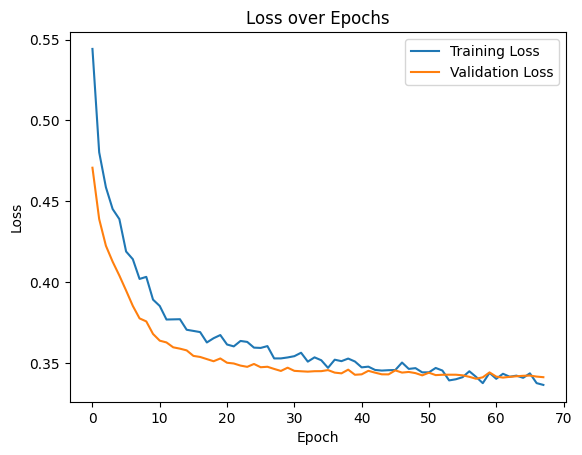

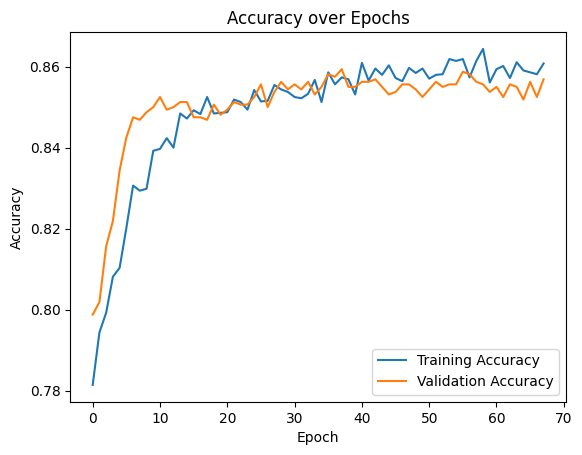

In [24]:
import matplotlib.pyplot as plt

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
